In [1]:
# Loading libraries
library(tidyverse)
library(RColorBrewer)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# Reading, renaming and mutating to factor format (pulsar), tidying

star_data <- read_csv("https://raw.githubusercontent.com/luigivicencio/dsci100-003-008/main/HTRU_2.csv", col_names = FALSE) |>
    rename("mean_ip" = X1, "sd_ip" = X2, "kurtosis_ip" = X3, 
           "skew_ip" = X4, "mean_dmsnr" = X5, "sd_dmsnr" = X6, 
           "kurtosis_dmsnr" = X7, "skew_dmsnr" = X8, "pulsar" = X9)|>
    mutate(pulsar = as_factor(pulsar)) |>
    mutate(pulsar = fct_recode(pulsar,"No" = "0", "Yes" = "1"))


star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip   sd_ip    kurtosis_ip  skew_ip     mean_dmsnr  sd_dmsnr 
1     140.56250 55.68378 -0.234571412 -0.69964840  3.1998328  19.110426
2     102.50781 58.88243  0.465318154 -0.51508791  1.6772575  14.860146
3     103.01562 39.34165  0.323328365  1.05116443  3.1212375  21.744669
4     136.75000 57.17845 -0.068414638 -0.63623837  3.6429766  20.959280
5      88.72656 40.67223  0.600866079  1.12349169  1.1789298  11.468720
6      93.57031 46.69811  0.531904850  0.41672112  1.6362876  14.545074
7     119.48438 48.76506  0.031460220 -0.11216757  0.9991639   9.279612
8     130.38281 39.84406 -0.158322759  0.38954045  1.2207358  14.378941
9     107.25000 52.62708  0.452688025  0.17034738  2.3319398  14.486853
10    107.25781 39.49649  0.465881961  1.16287712  4.0794314  24.980418
11    142.07812 45.28807 -0.320328426  0.28395251  5.3762542  29.009897
12    133.25781 44.05824 -0.081059862  0.11536151  1.6321070  12.007806
13    134.96094 49.55433 -0.135303833 -0.08046960 10.6964883  41.342044
14    117.94531 45.50658  0.325437564  0.66145946  2.8361204  23.118350
15    138.17969 51.52448 -0.031852329  0.04679717  6.3302676  31.576347
16    114.36719 51.94572 -0.094498904 -0.28798409  2.7382943  17.191891
17    109.64062 49.01765  0.137635830 -0.25669978  1.5083612  12.072901
18    100.85156 51.74352  0.393836792 -0.01124074  2.8411371  21.635778
19    136.09375 51.69100 -0.045908926 -0.27181639  9.3428094  38.096400
20     99.36719 41.57220  1.547196967  4.15410604 27.5551839  61.719016
21    100.89062 51.89039  0.627486528 -0.02649780  3.8837793  23.045267
22    105.44531 41.13997  0.142653801  0.32041968  3.5518395  20.755017
23     95.86719 42.05992  0.326386917  0.80350179  1.8327759  12.248969
24    117.36719 53.90861  0.257953441 -0.40504908  6.0183946  24.766123
25    106.64844 56.36718  0.378355072 -0.26637161  2.4364549  18.405371
26    112.71875 50.30127  0.279390953 -0.12901071  8.2817726  37.810012
27    130.85156 52.43286  0.142596727  0.01888544  2.6463211  15.654436
28    119.43750 52.87482 -0.002549267 -0.46036029  2.3653846  16.498032
29    123.21094 51.07801  0.179376819 -0.17728516  2.1070234  16.921773
30    102.61719 49.69235  0.230438984  0.19332537  1.4891304  16.004411
⋮     ⋮         ⋮        ⋮            ⋮           ⋮           ⋮        
17869  96.85938 49.82277  0.276811333 -0.33182398   1.7441472 14.764022
17870 137.37500 50.76278  0.085075173 -0.09267941   7.5610368 33.471080
17871 110.76562 55.34219  0.066099851 -0.50041490  14.3795987 45.320742
17872 119.00781 52.09104  0.215293531 -0.02022867   2.0125418 18.754594
17873 139.89844 44.28103 -0.044618449  0.10084109   1.1396321 11.196096
17874  89.45312 35.84883  0.731655618  3.10147356   1.4506689 14.204964
17875 126.55469 54.27589  0.207825362 -0.19168640   2.2943144 17.429850
17876 133.14062 43.70618 -0.012686084  0.23239435   2.0919732 13.489370
17877 111.76562 52.94359  0.671723986  0.38359393 149.8436455 97.926948
17878 118.29688 49.93282  0.144400986 -0.26927317   1.0418060 10.199265
17879  90.14844 40.78604  0.457138562  0.88551621   5.3545150 29.759511
17880 107.66406 44.46246  0.296045688  0.22776530   6.2909699 33.512873
17881 105.49219 43.50072  0.154180228  0.40811660   2.3160535 19.098507
17882 130.50000 46.14955  0.084445004 -0.10735478   1.5292642 11.757086
17883 131.00000 55.93579 -0.023598123 -0.53665128   1.1596990 10.856794
17884  84.42188 41.77556  0.757467101  1.10707476   1.3361204 12.026757
17885 106.87500 47.57133  0.199440015  0.28496422   3.0794314 20.984455
17886 133.82031 43.47816  0.136691092  0.35312123   0.9824415  9.486068
17887 127.07031 47.66356  0.006552426 -0.12363370   0.8536789 11.197206
17888 121.37500 53.24516  0.103772205 -0.36511875   1.0953177 12.239976
17889  98.72656 50.40782  0.565123614  0.24523085   0.5702341  9.011285
17890 126.62500 55.72183  0.002946216 -0.30321814   0.5342809  8.588882
17891 143.67188 45.30265 -0.045768538  0.35364267   5.1739130 26.462345
17892 118.48438 50.60848 -0.029058829 -0.02749

In [3]:
#Splitting the dataset into training and testing subgroups (where 75% of the data will be used as the training set)

star_split <- initial_split(star_data, prop = 0.75, strata = pulsar)  
star_train <- training(star_split)   
star_test <- testing(star_split)


In [4]:
#Creating a recipe, scaling, centering, and baking

star_recipe <- recipe(pulsar ~ ., data = star_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()


scaled_star <- bake(star_recipe, star_train)
scaled_star

mean_ip     sd_ip       kurtosis_ip  skew_ip     mean_dmsnr  sd_dmsnr   
1      1.14622655  1.33608570 -0.668266279 -0.39894999 -0.31732606 -0.36679476
2     -0.32364771 -1.05540403 -0.139122662 -0.11259969 -0.31998895 -0.23095179
3      0.99697590  1.55481357 -0.510673822 -0.38857910 -0.30231194 -0.27145281
4     -0.69341008  0.02113283  0.058703041 -0.21636466 -0.37030044 -0.60222145
5      0.32106618  0.32360740 -0.415946873 -0.30286587 -0.39188679 -0.87375151
6      0.74771507 -0.98188246 -0.595947755 -0.22081013 -0.38437972 -0.61078862
7     -0.15788161  0.88877103 -0.016430664 -0.25665976 -0.34673109 -0.60522381
8     -0.15757577 -1.03274507 -0.003916790 -0.09432877 -0.28752444 -0.06409024
9      1.20555980 -0.18521100 -0.749603068 -0.23807933 -0.24358687  0.14370250
10     0.86026475 -0.36518280 -0.522667266 -0.26565286 -0.37044208 -0.73306366
11     0.92693819  0.43910792 -0.574115307 -0.29768158 -0.06333236  0.77964827
12     0.26081540 -0.15323527 -0.137122178 -0.17633702 -0.32964898 -0.16011363
13     1.05294489  0.72741851 -0.475996066 -0.27686674 -0.21126400  0.27604950
14     0.12074000  0.78906114 -0.535413611 -0.33162115 -0.33296342 -0.46573006
15    -0.06429411  0.36057157 -0.315243936 -0.32650451 -0.37463471 -0.72970680
16    -0.40836580  0.75947231 -0.072248492 -0.28635900 -0.32947901 -0.23656711
17     0.97128521  0.75178703 -0.489328135 -0.32897688 -0.10919627  0.61227646
18    -0.46647569 -0.72898741  1.021663353  0.39489502  0.50785604  1.83045072
19    -0.60349268 -0.65761499 -0.136221758 -0.15310560 -0.36364323 -0.72062729
20    -0.18143141  1.43609370 -0.086932229 -0.32808637 -0.34319002 -0.40315317
21     0.05620744  0.54841481 -0.180795381 -0.30562061 -0.14514519  0.59750800
22     0.31923113  0.92502458 -0.448203389 -0.35981375 -0.34559795 -0.50151107
23    -0.33924562  0.45930665 -0.227224190 -0.25290165 -0.37528626 -0.52696616
24    -0.04594362 -0.76616220 -0.355814568 -0.17279559 -0.39151852 -0.68054309
25    -0.44506678 -0.38548671  0.005422223 -0.15670631 -0.40474795 -0.86543029
26     1.20464228  1.07112118 -0.892292890 -0.30511944 -0.27588141  0.04436243
27     0.38559874  0.15788547 -0.277567000 -0.28044512 -0.35285006 -0.29243294
28    -0.35056176  0.35512050 -0.146329940 -0.31758819 -0.36140528 -0.63863032
29     1.43096499  1.03445991 -0.570108803 -0.33176296 -0.33452149 -0.47145463
30    -0.12699162 -1.70389124 -0.141182522  0.01341233 -0.29361508 -0.12898183
⋮     ⋮           ⋮           ⋮            ⋮           ⋮           ⋮          
13394  0.75780784  0.7783983  -0.30737516  -0.25541897 -0.09191586  0.49753277
13395 -0.74632066 -1.7167931   0.08235120   0.15755525 -0.30336009 -0.20185707
13396 -1.25615844 -1.3285059   0.25121823   0.11430289 -0.35967724 -0.58247736
13397  0.97770788 -0.9274429  -0.35537647  -0.22088058 -0.35602285 -0.45468353
13398 -0.39154452 -1.6525197  -0.00995412   0.07298387 -0.38287831 -0.75157264
13399  0.15285335  1.3161663  -0.32031824  -0.34786810 -0.27806271  0.08853866
13400  1.00370441  0.6750522  -0.42282336  -0.31632881 -0.39010209 -0.81370511
13401  0.79817892  0.5378879  -0.35604413  -0.36115887 -0.40701423 -0.82885285
13402 -0.56465081  0.4783915  -0.18324204  -0.33879128 -0.36664606 -0.59093073
13403  1.02144322  0.6159510  -0.36509543  -0.29967852 -0.16956439  0.37375734
13404 -0.02025294  1.2860969  -0.38309269  -0.36636480  0.06145487  0.98482230
13405  0.30240985  0.8103278  -0.24158899  -0.28782900 -0.35755259 -0.38514438
13406 -0.85458855 -1.5665398   0.24815794   0.22273405 -0.37658937 -0.61976029
13407  0.85567712 -0.4167033  -0.45781772  -0.24651181 -0.35486138 -0.65666213
13408  0.01889478  0.9350883   0.19131540  -0.22178270  4.65110361  3.69762623
13409  0.27457827  0.4944967  -0.30882748  -0.32856092 -0.39044203 -0.82632673
13410 -0.82736866 -0.8440329  -0.01220952  -0.13969192 -0.24432341  0.18235867
13411 -0.14167201 -0.3060299  -0.16499909  -0.24726890 -0.21259544  0.37591255
13412 -0.22669595 -0.4467706  -0.29955230  -0.21777195 -

In [5]:
#Computing summary statistics for the training data set
star_table <- group_by(scaled_star, pulsar) |>
    summarize(count = n(),
             missing_values = sum(is.na(star_data)), # check that
             mean_mean_ip = mean(mean_ip), # check that
             mean_sd_ip = mean(sd_ip),
             mean_skew_ip = mean(skew_ip),
             mean_kurtosis_ip = mean(kurtosis_ip),
             mean_mean_dmsnr = mean(mean_dmsnr),
             mean_sd_dmsnr = mean(sd_dmsnr),
             mean_skew_dmsnr = mean(skew_dmsnr),
             mean_kurtosis_dmsnr = mean(kurtosis_dmsnr))

star_table

pulsar count missing_values mean_mean_ip mean_sd_ip mean_skew_ip
1 No     12214 0               0.2103943    0.1111435 -0.2215359  
2 Yes     1209 0              -2.1255221   -1.1228347  2.2380802  
  mean_kurtosis_ip mean_mean_dmsnr mean_sd_dmsnr mean_skew_dmsnr
1 -0.2478531       -0.1243934      -0.1542671     0.0804921     
2  2.5039523        1.2566925       1.5584932    -0.8131766     
  mean_kurtosis_dmsnr
1  0.1218565         
2 -1.2310632

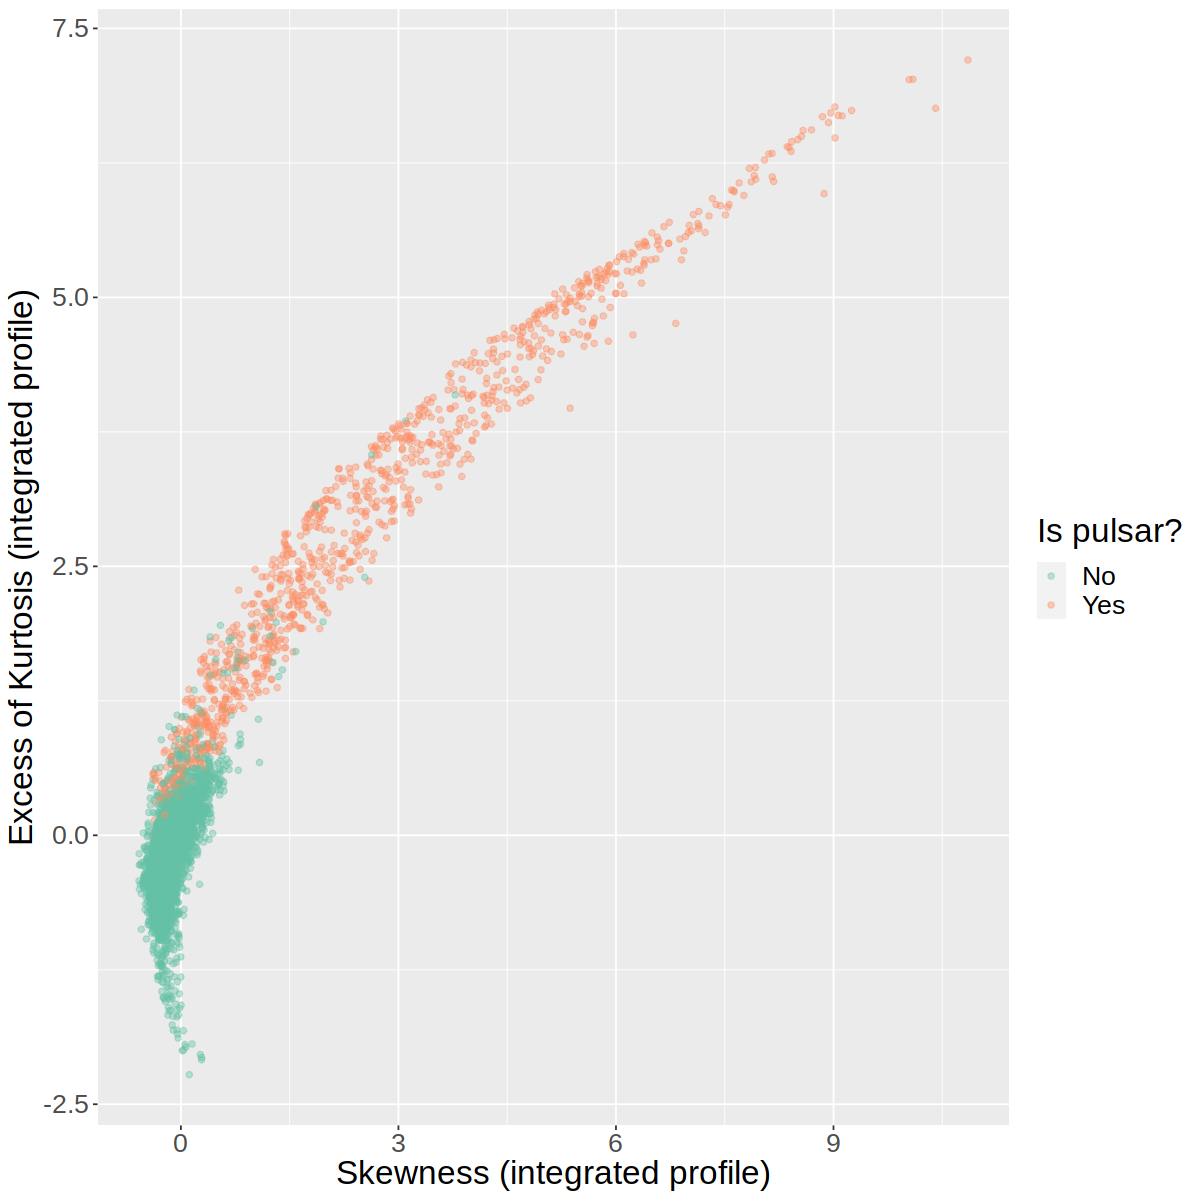

In [6]:
#Creating an initial plot to visualize the data

options(repr.plot.width = 10, repr.plot.height = 10)

star_plot_skew <- ggplot (scaled_star, aes(x = skew_ip, y = kurtosis_ip, color = pulsar)) +
                geom_point(alpha = 0.4) +
                labs(y = "Excess of Kurtosis (integrated profile)", x = "Skewness (integrated profile)", color = "Is pulsar?") + 
                ggtitle("Excess Kurtosis 
                theme(text = element_text(size = 20)) + 
                scale_color_brewer(palette = "Set2")


star_plot_skew